In [1]:
!pip install validclust
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn import metrics
import warnings
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from validclust import dunn
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
upload_file = files.upload()

Saving World Indicators.csv to World Indicators (2).csv


<h1>Task-2</h1>

In [46]:
#reading the world indicators dataset
df_wi_health = pd.read_csv('World Indicators.csv')
df_wi_health

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.00%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.10%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.90%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.50%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.50%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.50%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.90%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.80%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [47]:
#checking the dataset if it have null values more than 30%, dropping the column from the dataframe
perc = 30.0 # Like N %
min_count =  int(((100-perc)/100)*df_wi_health.shape[0] + 1)
#dropping the columns which have more 30% null values
df_wi_health_filtered = df_wi_health.dropna( axis=1, 
                thresh=min_count)

In [48]:
#We have most null columns and now there are null values in different rows we can drop those rows using dropna function
df_wi_health_cleaned=df_wi_health_filtered.dropna()
df_wi_health_cleaned.reset_index(inplace=True)

In [49]:
cols_to_check=list(df_wi_health_cleaned.columns)
# cols_to_check
#Removing the special characters from the dataframe interating with all the columns
df_wi_health_cleaned[cols_to_check] = df_wi_health_cleaned[cols_to_check].replace({'%':''}, regex=True)
df_wi_health_cleaned[cols_to_check] = df_wi_health_cleaned[cols_to_check].replace({',':''}, regex=True)
df_wi_health_cleaned['GDP'] = df_wi_health_cleaned['GDP'].str.replace('$','')
df_wi_health_cleaned['Health Exp/Capita'] = df_wi_health_cleaned['Health Exp/Capita'].str.replace('$','')
#the below dataframe have the cleaned data
df_wi_health_cleaned

,index,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0,0.025,72.00,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,1,0.046,52.10,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,2,0.037,65.90,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,3,0.024,19.50,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,4,0.042,43.50,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,201,0.018,27.90,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
167,202,0.015,29.10,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
168,204,0.013,46.50,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
169,205,0.015,41.90,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [50]:
#converting all the columns from object to float64 except categorical columns, to perform clustering techniques
df_wi_health_cleaned['Health Exp/Capita'] = df_wi_health_cleaned['Health Exp/Capita'].astype(np.float64)
df_wi_health_cleaned['Business Tax Rate'] = df_wi_health_cleaned['Business Tax Rate'].astype(np.float64)
df_wi_health_cleaned['GDP'] = df_wi_health_cleaned['GDP'].astype(np.float64)
df_wi_health_cleaned.dtypes


index                       int64
Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [51]:
# define min max scaler
#As by seeing the dataset each column has different values, so we don't get the efficient prediction, so we need to scale the numeric columns using minmaxscaler 
scaler = MinMaxScaler()
# transform data
df_wi_scaled = pd.DataFrame(scaler.fit_transform(df_wi_health_cleaned.iloc[:,0:16].values),columns=cols_to_check[:16])
df_wi_scaled #this the scaled dataframe

,index,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+
0,0.000000,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034
1,0.004854,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744
2,0.009709,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111
3,0.014563,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752
4,0.019417,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.975728,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957
167,0.980583,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427
168,0.990291,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556
169,0.995146,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197



2.1A KMEANS CLUSTERING USING ELBOW METHOD



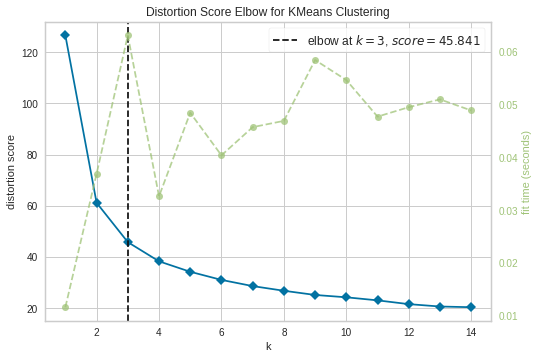



No of clusters using KMeans Algorithm 3 

[2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 0 2 2 0 2 0 2 1 2 2 2 1 2 0 2 1 2
 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 2 2 0 2 2 0 2 0 2 0 1 0 2 2 2 0 1 2 2 2 2 2 0 0 2 2 2 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2]


In [52]:
#Task-1.1A K-means Clustering of analysis-1
#Reference https://stackabuse.com/k-means-elbow-method-and-silhouette-analysis-with-yellowbrick-and-scikit-learn/
#Predicting the number of clusters using elbow method and plotting the graph
print("\n2.1A KMEANS CLUSTERING USING ELBOW METHOD\n")
kmeans_model1 = KMeans()
elbow_graph = KElbowVisualizer(kmeans_model1, k =(1,15)).fit(df_wi_scaled.iloc[:,0:16])
elbow_graph.show()
print('\n')
print('No of clusters using KMeans Algorithm', elbow_graph.elbow_value_,'\n')
k_means_values = KMeans(n_clusters = elbow_graph.elbow_value_, init = 'k-means++',  random_state=42)
No_of_KMeans_Clusters_Analysis_1 = k_means_values.fit_predict(df_wi_scaled.iloc[:,0:16])
print(No_of_KMeans_Clusters_Analysis_1)

By the above elbow method for the k-means clustering it predicts k as 3, but before proceeding further we need to check for other validation metrics like Silhouette Score, Dunn Index, CH metric


2.1A KMEANS CLUSTERING USING SILHOUETTE METHOD





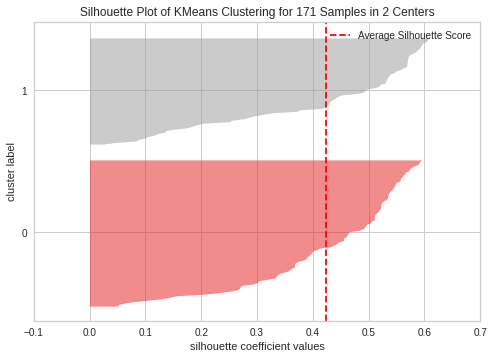

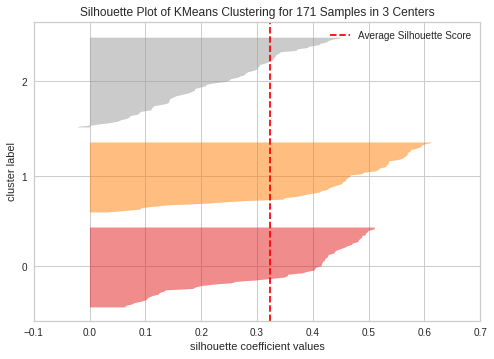

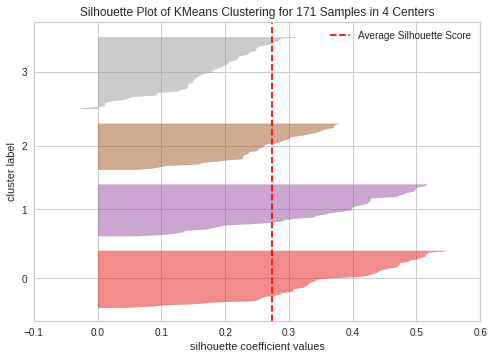

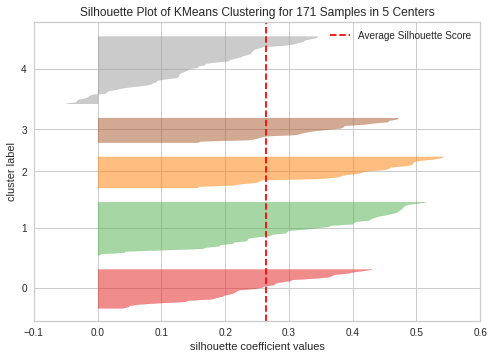

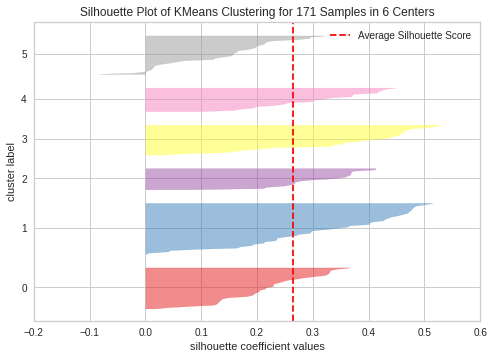

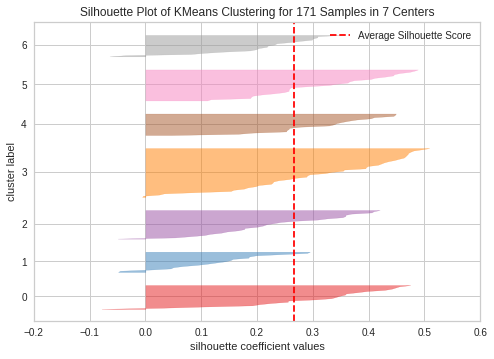

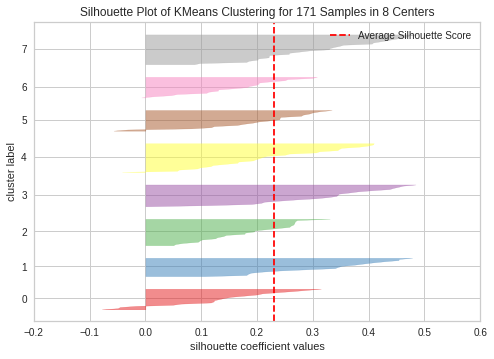

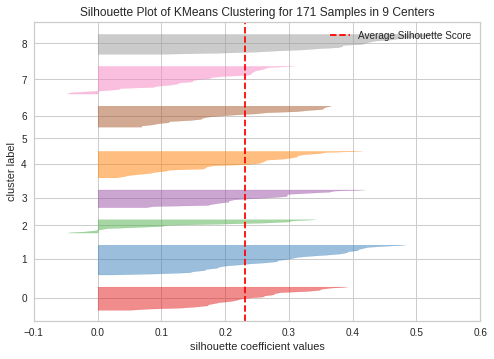

In [53]:
#K-means Clustering using silhouette visualizer 
print("\n2.1A KMEANS CLUSTERING USING SILHOUETTE METHOD\n")
#iterating the number of cluster to identify the correct fit for k-means clustering
for i in range(2,10):
  kmeans_model1 = KMeans(n_clusters=i,random_state=42)
  silhouette_visualizer = SilhouetteVisualizer(kmeans_model1)
  silhouette_visualizer.fit(df_wi_scaled.values)
  print('\n')
  silhouette_visualizer.show()


In above result, by looking at the visualizations which starts with 2 to 9, where we can start checking from 2 which have unequal cluster sizes, then when we move to the 3 cluster these are equally balanced in all the clusters. So ideally we can consider k as 3 for k-means clustering
Reference: https://stackabuse.com/k-means-elbow-method-and-silhouette-analysis-with-yellowbrick-and-scikit-learn/

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [54]:
# Task 2.2 Calculate the performance metrics for kmeans clustering algorithms by using internal validation
print('\n 2.2A PERFORMANCE METRICS OF KMEANS CLUSTERING \n')
#iterating over the different clusters, to check the internal validation
for i in range(2,10):
  #training the data with k-means clustering technique
  kmeans_model_data = KMeans(n_clusters=i,random_state=42)
  #finding the pairwise distances using the below function which can be used for calculating the dunn index
  dist_cohesiveKMeans = pairwise_distances(df_wi_scaled.values)
  kmeans_model_data.fit(df_wi_scaled.values)
  dunn_values = kmeans_model_data.labels_
  dunn_cohesiveKMeans = dunn(dist_cohesiveKMeans,dunn_values)
  print("\nPerformance of Kmeans Metrics for Cluster(s) -",str(i))
  print('DUNN INDEX VALUE ', dunn_cohesiveKMeans)
  print('SILHOUETTE SCORE', silhouette_score(df_wi_scaled.values, kmeans_model_data.labels_, metric='euclidean'))
  print('DAVIS BOULDIN SCORE', davies_bouldin_score(df_wi_scaled.values, kmeans_model_data.labels_))
  print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(df_wi_scaled.values,kmeans_model_data.labels_))


 2.2A PERFORMANCE METRICS OF KMEANS CLUSTERING 


Performance of Kmeans Metrics for Cluster(s) - 2
DUNN INDEX VALUE  0.13300439529112504
SILHOUETTE SCORE 0.4230656439524863
DAVIS BOULDIN SCORE 0.9064254426948565
CALINSKI HARABASZ SCORE 180.42375614644683

Performance of Kmeans Metrics for Cluster(s) - 3
DUNN INDEX VALUE  0.1525756053186821
SILHOUETTE SCORE 0.32251888087702096
DAVIS BOULDIN SCORE 1.143834607949973
CALINSKI HARABASZ SCORE 147.92599875398187

Performance of Kmeans Metrics for Cluster(s) - 4
DUNN INDEX VALUE  0.1397934420098049
SILHOUETTE SCORE 0.2740334789240692
DAVIS BOULDIN SCORE 1.29738983083683
CALINSKI HARABASZ SCORE 128.08042283587957

Performance of Kmeans Metrics for Cluster(s) - 5
DUNN INDEX VALUE  0.17119513029837533
SILHOUETTE SCORE 0.2635128835044068
DAVIS BOULDIN SCORE 1.1741144129353027
CALINSKI HARABASZ SCORE 111.92617226207294

Performance of Kmeans Metrics for Cluster(s) - 6
DUNN INDEX VALUE  0.17119513029837533
SILHOUETTE SCORE 0.2636911354624631
DAVIS 

In [55]:
# Task 2.2 Calculate the performance metrics for hierarical clustering algorithms by using internal validation
print('\n 2.2B PERFORMANCE METRICS OF HIERARICAL CLUSTERING \n')
for i in range(2,10):
  agglomerative_model1 = AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='ward')
  dist_cohesiveKMeans = pairwise_distances(df_wi_scaled.values)
  agglomerative_model1.fit(df_wi_scaled.values)
  agg_dunn_values = agglomerative_model1.labels_
  agg_dunn_cohesiveKMeans = dunn(dist_cohesiveKMeans,agg_dunn_values)
  print("\nPerformance of Hierarical Metrics for Cluster(s) -",str(i))
  print('DUNN INDEX VALUE ', agg_dunn_cohesiveKMeans)
  print('SILHOUETTE SCORE', silhouette_score(df_wi_scaled.values, agglomerative_model1.labels_, metric='euclidean'))
  print('DAVIS BOULDIN SCORE', davies_bouldin_score(df_wi_scaled.values, kmeans_model_data.labels_))
  print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(df_wi_scaled.values,kmeans_model_data.labels_))


 2.2B PERFORMANCE METRICS OF HIERARICAL CLUSTERING 


Performance of Hierarical Metrics for Cluster(s) - 2
DUNN INDEX VALUE  0.162280005045453
SILHOUETTE SCORE 0.41395617772365456
DAVIS BOULDIN SCORE 1.271218741385937
CALINSKI HARABASZ SCORE 79.77988120699663

Performance of Hierarical Metrics for Cluster(s) - 3
DUNN INDEX VALUE  0.16563034430016696
SILHOUETTE SCORE 0.31652350220556863
DAVIS BOULDIN SCORE 1.271218741385937
CALINSKI HARABASZ SCORE 79.77988120699663

Performance of Hierarical Metrics for Cluster(s) - 4
DUNN INDEX VALUE  0.138240058060501
SILHOUETTE SCORE 0.26368096354621057
DAVIS BOULDIN SCORE 1.271218741385937
CALINSKI HARABASZ SCORE 79.77988120699663

Performance of Hierarical Metrics for Cluster(s) - 5
DUNN INDEX VALUE  0.138240058060501
SILHOUETTE SCORE 0.28571054704830207
DAVIS BOULDIN SCORE 1.271218741385937
CALINSKI HARABASZ SCORE 79.77988120699663

Performance of Hierarical Metrics for Cluster(s) - 6
DUNN INDEX VALUE  0.15938706773808434
SILHOUETTE SCORE 0.27813

From the above score we can decide the optimum number of clusters for the K-means and Hierarical Clustering. 

For K-means we have checked it by silhouette vizualizer, elbow graph and decided n_clusters would be 3

For Hierarical we have checked it by silhouette score, dunn index and decided n_clusters would be 2


Best clustering solution for this dataset would be hierarical, as it has good silhouette score and dunn index, There is just minute difference between the k-means and hierarical metrics

In [56]:
#Task-2.3 Training the model with exact cluster number

#For Kmeans we have got '3' as optimum number of clusters as we don't have any negative values, each cluster is balanced and it have average silhouette score
kmeans_model_3 = KMeans(n_clusters=3,random_state=42)
kmeans_model_3.fit(df_wi_scaled.values)
km_predicted = kmeans_model_3.labels_

#For Agglomerative we have got '2' as the efficient number of clusters by comparing the silhouette scores
agglomerative_model_2 = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
agglomerative_model_2.fit(df_wi_scaled.values)
am_predicted = agglomerative_model_2.labels_

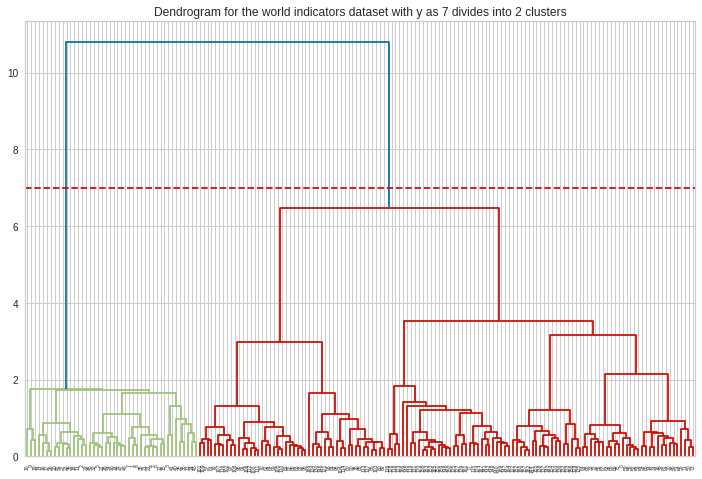

In [57]:
#Plotting the dendrogram
# Creating figure
fig = plt.figure(figsize = (12, 8))
plt.title("Dendrogram for the world indicators dataset with y as 7 divides into 2 clusters")  
shc.dendrogram(shc.linkage(df_wi_scaled.values, method='ward',metric='euclidean'))
plt.axhline(y=7, color='r', linestyle='--')

In [58]:
# Task 2.3A K-means cluster 
#grouping the data by country for the k-means predicted clusters
df_wi_scaled['region'] = df_wi_health_cleaned['Region']
df_wi_scaled['country'] = df_wi_health_cleaned['Country']
wi_health_KMclustered = df_wi_scaled.copy()
wi_health_KMclustered['cluster'] = km_predicted
print('GROUPING BASED ON KMEANS \n')
print('\nCOUNTRIES IN CLUSTER 1:\n',wi_health_KMclustered[wi_health_KMclustered.cluster==0]['country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_health_KMclustered[wi_health_KMclustered.cluster==1]['country'])
print('\nCOUNTRIES IN CLUSTER 3:\n',wi_health_KMclustered[wi_health_KMclustered.cluster==2]['country'])

GROUPING BASED ON KMEANS 


COUNTRIES IN CLUSTER 1:
 57                    Georgia
60                      Japan
62                 Korea Rep.
70                  Singapore
77                    Albania
78                    Austria
79                    Belarus
80                    Belgium
81     Bosnia and Herzegovina
82                   Bulgaria
83                    Croatia
84                     Cyprus
85             Czech Republic
86                    Denmark
87                    Estonia
88                    Finland
89                     France
90                    Germany
91                     Greece
92                    Hungary
93                    Iceland
94                    Ireland
95                      Italy
96                     Latvia
97                  Lithuania
98                 Luxembourg
99              Macedonia FYR
100                     Malta
101                   Moldova
102                Montenegro
103               Netherlands
104              

In [59]:
#grouping the data by country for the hierarical predicted clusters
wi_health_HCclustered =  df_wi_scaled.copy()
wi_health_HCclustered['cluster'] = am_predicted
wi_health_HCcluster1 = wi_health_HCclustered[wi_health_HCclustered.cluster==0]
wi_health_HCcluster2 = wi_health_HCclustered[wi_health_HCclustered.cluster==1]
print('GROUPING THE DATA BASED ON HIERARCHICAL CLUSTERING \n')
print('COUNTRIES IN CLUSTER 1:\n',wi_health_HCcluster1['country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_health_HCcluster2['country'])

GROUPING THE DATA BASED ON HIERARCHICAL CLUSTERING 

COUNTRIES IN CLUSTER 1:
 0                  Algeria
14         Egypt Arab Rep.
30               Mauritius
31                 Morocco
33                 Namibia
              ...         
166               Suriname
167    Trinidad and Tobago
168          United States
169                Uruguay
170           Venezuela RB
Name: country, Length: 127, dtype: object

COUNTRIES IN CLUSTER 2:
 1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10             Congo Dem. Rep.
11                  Congo Rep.
12               Cote d'Ivoire
13                    Djibouti
15           Equatorial Guinea
16                     Eritrea
17                    Ethiopia
18                       Gabon
19                  Gambia The


 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE WITH 3 CLUSTERS



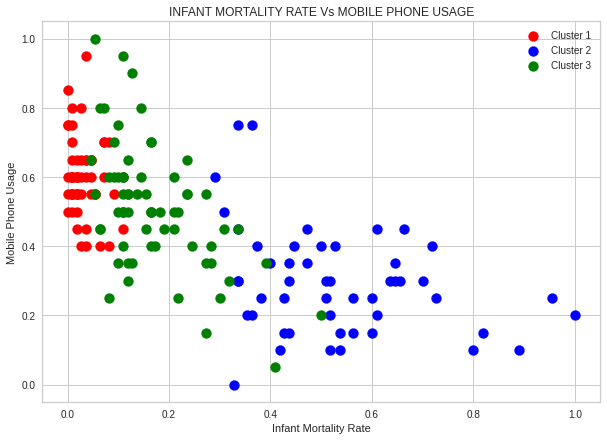


 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE WITH 2 CLUSTERS 



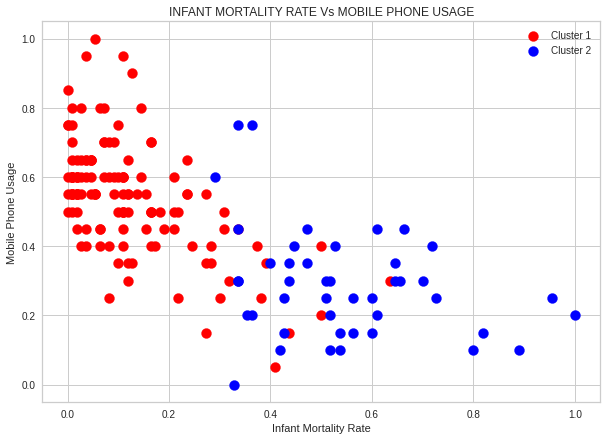

In [60]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE WITH 3 CLUSTERS\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Mobile Phone Usage'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Mobile Phone Usage'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Mobile Phone Usage'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('INFANT MORTALITY RATE Vs MOBILE PHONE USAGE')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Mobile Phone Usage')
plt.legend()
plt.show()

print("\n 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE WITH 2 CLUSTERS \n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Infant Mortality Rate'], wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Mobile Phone Usage'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Infant Mortality Rate'], wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Mobile Phone Usage'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('INFANT MORTALITY RATE Vs MOBILE PHONE USAGE')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Mobile Phone Usage')
plt.legend()
plt.show()


 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF INTERNET USAGE Vs POPULATION 65+ WITH 3 CLUSTERS



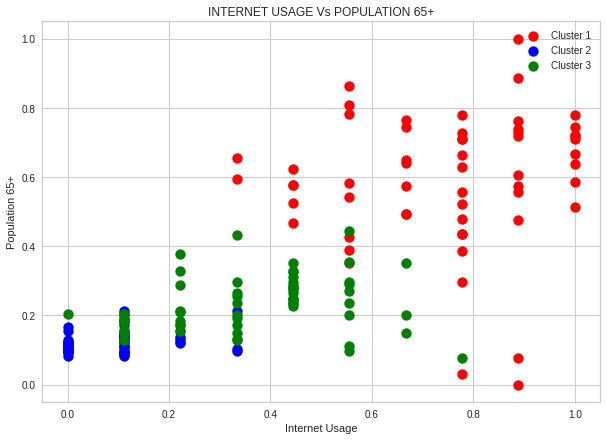


 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE WITH 2 CLUSTERS 



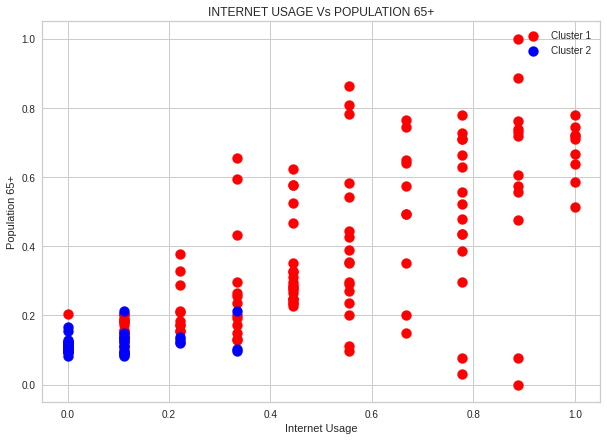

In [61]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF INTERNET USAGE Vs POPULATION 65+ WITH 3 CLUSTERS\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Internet Usage'], wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Population 65+'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Internet Usage'], wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Population 65+'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Internet Usage'], wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Population 65+'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('INTERNET USAGE Vs POPULATION 65+')
plt.xlabel('Internet Usage')
plt.ylabel('Population 65+')
plt.legend()
plt.show()

print("\n 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE WITH 2 CLUSTERS \n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Internet Usage'], wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Population 65+'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Internet Usage'], wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Population 65+'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('INTERNET USAGE Vs POPULATION 65+')
plt.xlabel('Internet Usage')
plt.ylabel('Population 65+')
plt.legend()
plt.show()

In [62]:
wi_health_KMclustered.columns

Index(['index', 'Birth Rate', 'Business Tax Rate', 'Days to Start Business',
       'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'region', 'country', 'cluster'],
      dtype='object')


 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF HOURS TO DO TAX Vs BUSINESS TAX RATE WITH 3 CLUSTERS



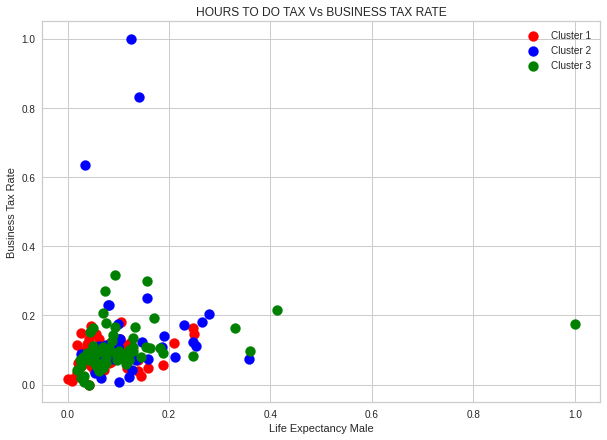


 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF HOURS TO DO TAX Vs BUSINESS TAX RATE WITH 2 CLUSTERS 



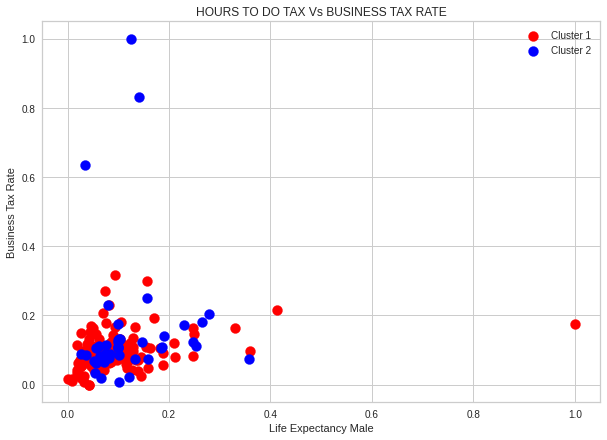

In [63]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF HOURS TO DO TAX Vs BUSINESS TAX RATE WITH 3 CLUSTERS\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Hours to do Tax'], wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Business Tax Rate'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Hours to do Tax'], wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Business Tax Rate'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Hours to do Tax'], wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Business Tax Rate'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('HOURS TO DO TAX Vs BUSINESS TAX RATE')
plt.xlabel('Life Expectancy Male')
plt.ylabel('Business Tax Rate')
plt.legend()
plt.show()

print("\n 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF HOURS TO DO TAX Vs BUSINESS TAX RATE WITH 2 CLUSTERS \n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Hours to do Tax'], wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Business Tax Rate'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Hours to do Tax'], wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Business Tax Rate'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('HOURS TO DO TAX Vs BUSINESS TAX RATE')
plt.xlabel('Life Expectancy Male')
plt.ylabel('Business Tax Rate')
plt.legend()
plt.show()


 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF LIFE EXPECTANCY MALE Vs GDP WITH 3 CLUSTERS



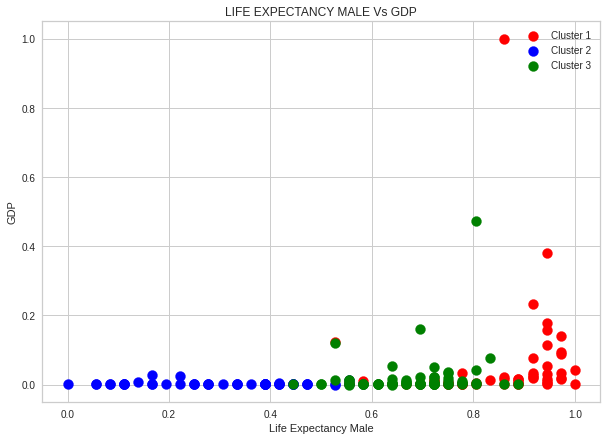


 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF LIFE EXPECTANCY MALE Vs GDP WITH 2 CLUSTERS 



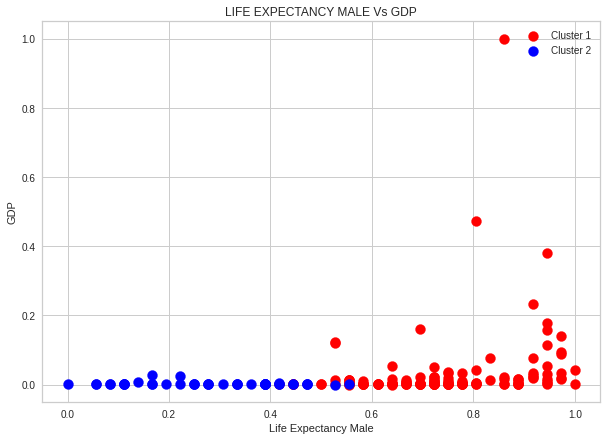

In [64]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF LIFE EXPECTANCY MALE Vs GDP WITH 3 CLUSTERS\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Life Expectancy Male'], wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['GDP'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Life Expectancy Male'], wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['GDP'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Life Expectancy Male'], wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['GDP'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('LIFE EXPECTANCY MALE Vs GDP')
plt.xlabel('Life Expectancy Male')
plt.ylabel('GDP')
plt.legend()
plt.show()

print("\n 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF LIFE EXPECTANCY MALE Vs GDP WITH 2 CLUSTERS \n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Life Expectancy Male'], wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['GDP'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Life Expectancy Male'], wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['GDP'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('LIFE EXPECTANCY MALE Vs GDP')
plt.xlabel('Life Expectancy Male')
plt.ylabel('GDP')
plt.legend()
plt.show()


 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF LIFE EXPECTANCY FEMALE Vs GDP WITH 3 CLUSTERS



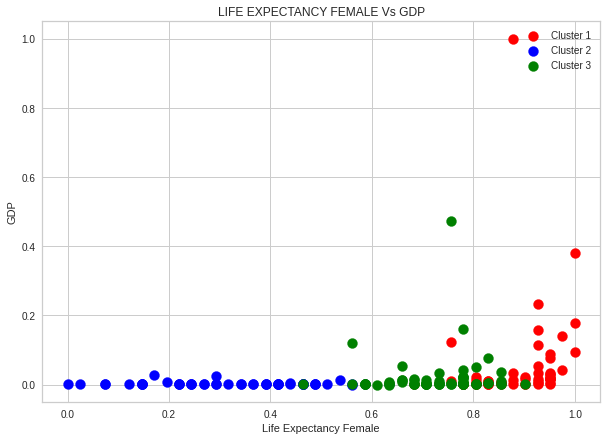


 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF LIFE EXPECTANCY FEMALE Vs GDP WITH 2 CLUSTERS 



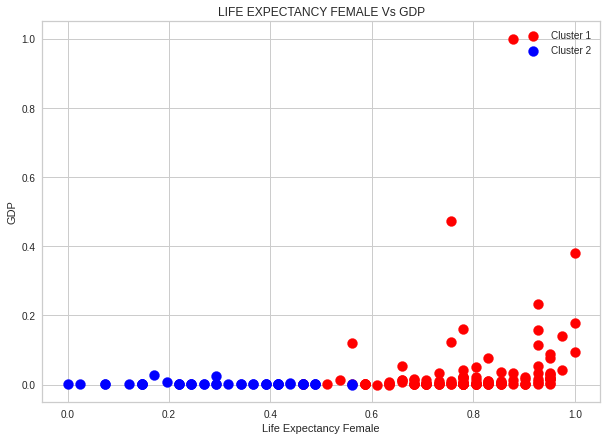

In [65]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 PLOTTING THE DATA POINTS USING KMEANS CLUSTERS OF LIFE EXPECTANCY FEMALE Vs GDP WITH 3 CLUSTERS\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['Life Expectancy Female'], wi_health_KMclustered[wi_health_KMclustered.cluster == 0]['GDP'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['Life Expectancy Female'], wi_health_KMclustered[wi_health_KMclustered.cluster == 1]['GDP'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['Life Expectancy Female'], wi_health_KMclustered[wi_health_KMclustered.cluster == 2]['GDP'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('LIFE EXPECTANCY FEMALE Vs GDP')
plt.xlabel('Life Expectancy Female')
plt.ylabel('GDP')
plt.legend()
plt.show()

print("\n 1.4 PLOTTING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF LIFE EXPECTANCY FEMALE Vs GDP WITH 2 CLUSTERS \n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['Life Expectancy Female'], wi_health_HCclustered[wi_health_HCclustered.cluster == 0]['GDP'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['Life Expectancy Female'], wi_health_HCclustered[wi_health_HCclustered.cluster == 1]['GDP'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('LIFE EXPECTANCY FEMALE Vs GDP')
plt.xlabel('Life Expectancy Female')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [66]:
!jupyter nbconvert --to html project_1_task_2.ipynb

[NbConvertApp] Converting notebook project_1_task_2.ipynb to html
[NbConvertApp] Writing 1034086 bytes to project_1_task_2.html
